# Customer Booking Analysis

---

## Predictive modeling of customer bookings

This Jupyter notebook has an analysis and predictive modeling for customer booking behavior.

### Importing libraries



In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 35)
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [36]:
df = pd.read_csv(r"C:\Users\TRADELIST\Desktop\INTERNSHIPS\BRITISH AIRWAYS\Task 2\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [38]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [39]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [40]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [41]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### EDA

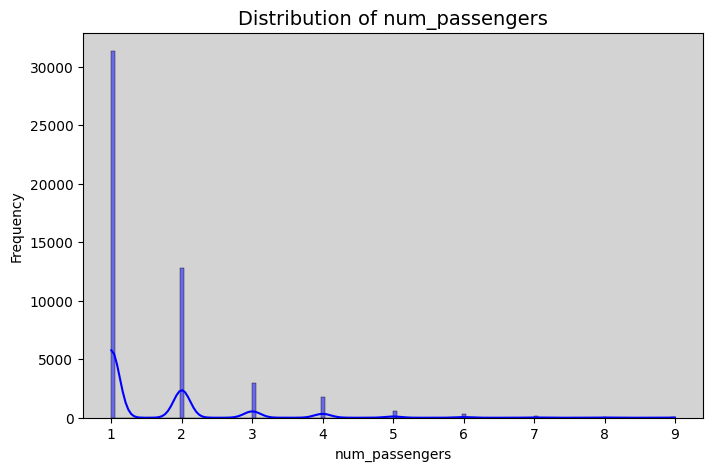

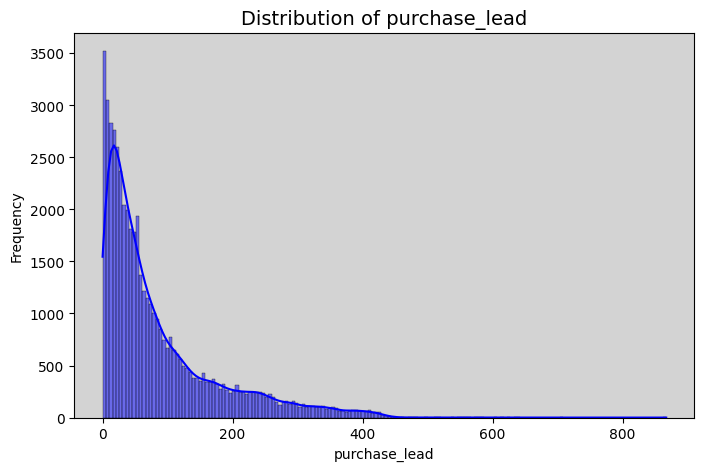

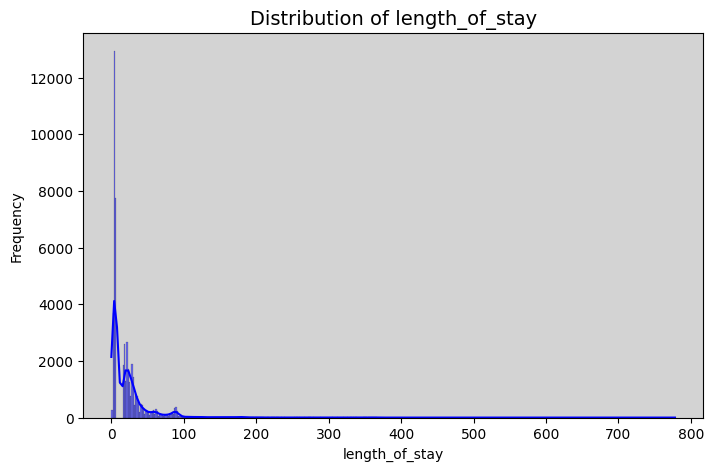

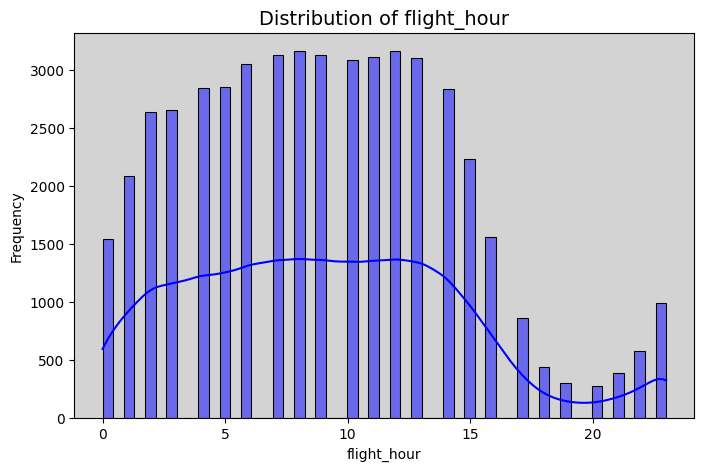

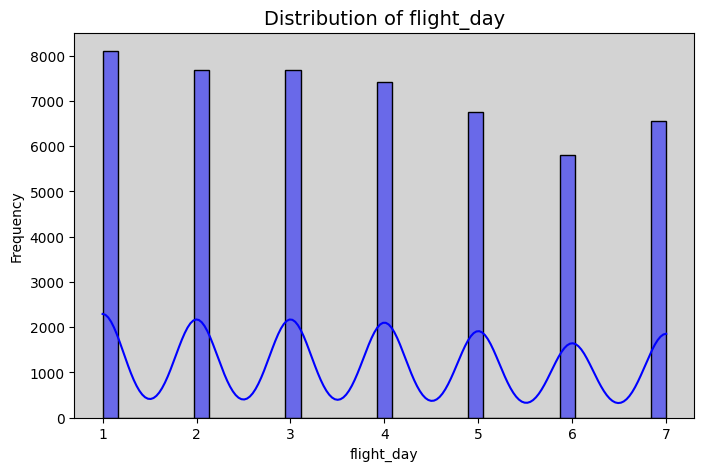

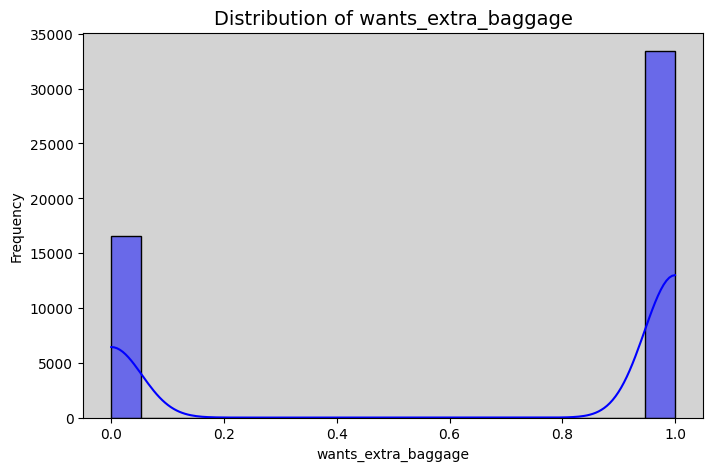

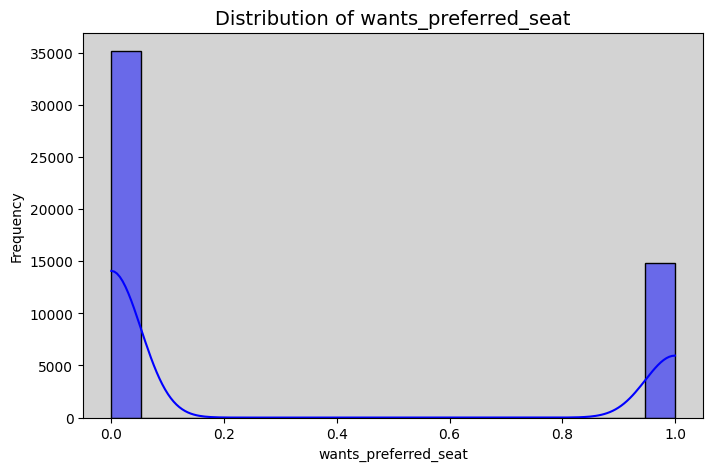

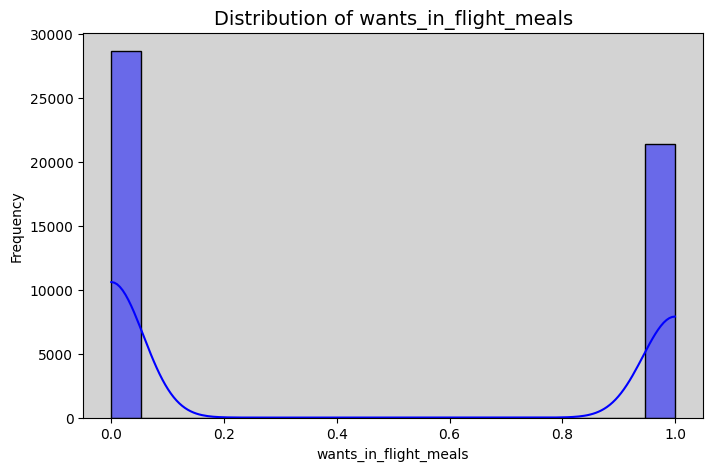

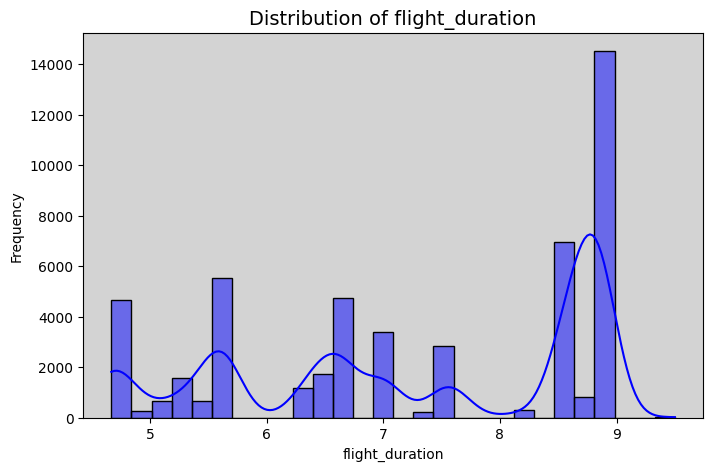

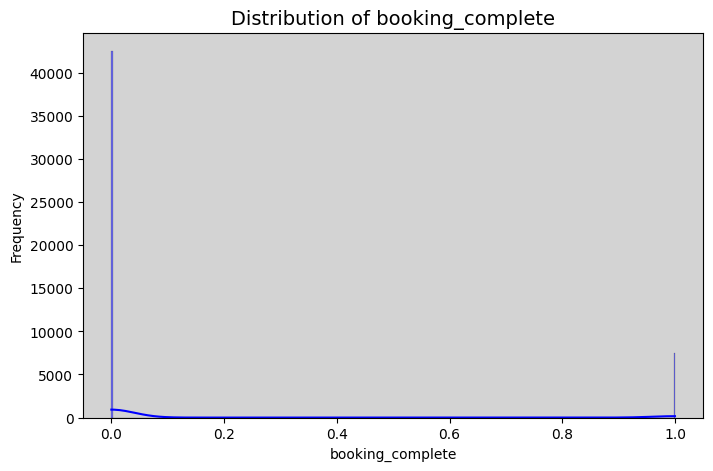

In [42]:
desc_cols = df.select_dtypes(include=[np.number]).columns

for col in desc_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], color='blue', kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.gca().set_facecolor('lightgrey')
    plt.grid(False)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [43]:
mapping = {
    1:"Mon",
    2:"Tue",
    3:"Wed",
    4:"Thu",
    5:"Fri",
    6:"Sat",
    7:"Sun",
}

df["flight_day"] = df["flight_day"].map(mapping)

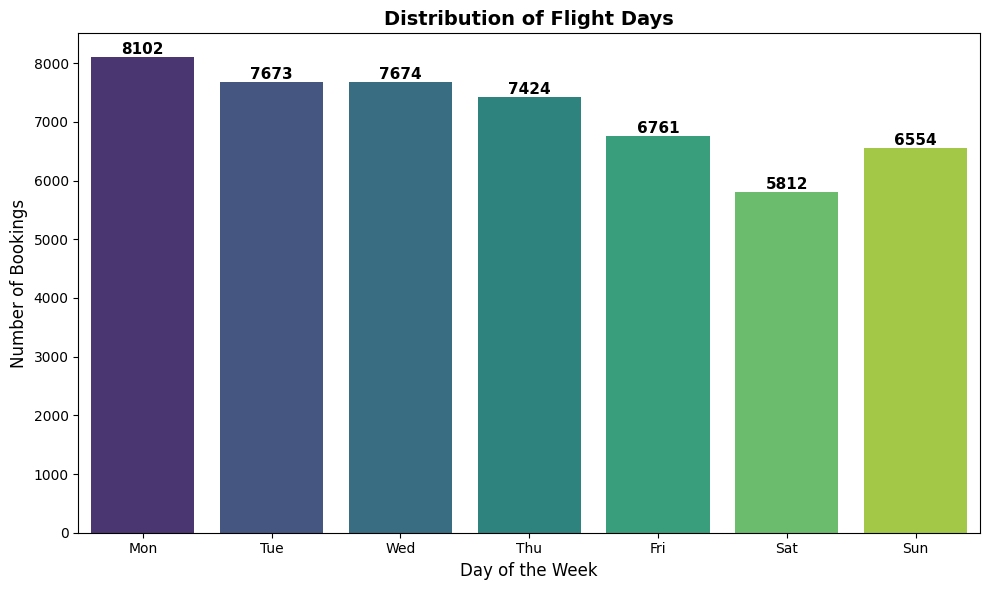

In [44]:
# Define day order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Get counts in correct order
day_counts = df['flight_day'].value_counts().reindex(day_order, fill_value=0)

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Distribution of Flight Days', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

# Add value labels
for i, v in enumerate(day_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

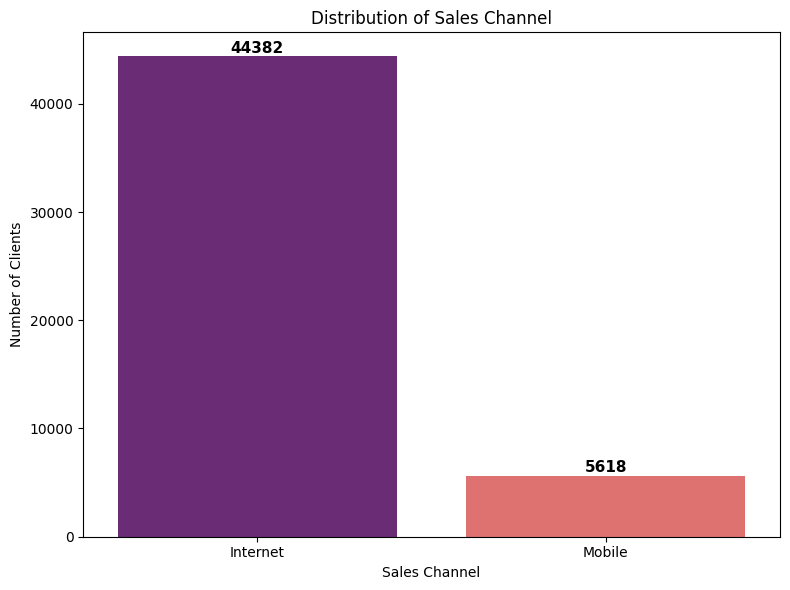

In [45]:
sales_channel = df['sales_channel'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sales_channel.index, y=sales_channel.values, palette='magma')
plt.title('Distribution of Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Clients')
for i, v in enumerate(sales_channel.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

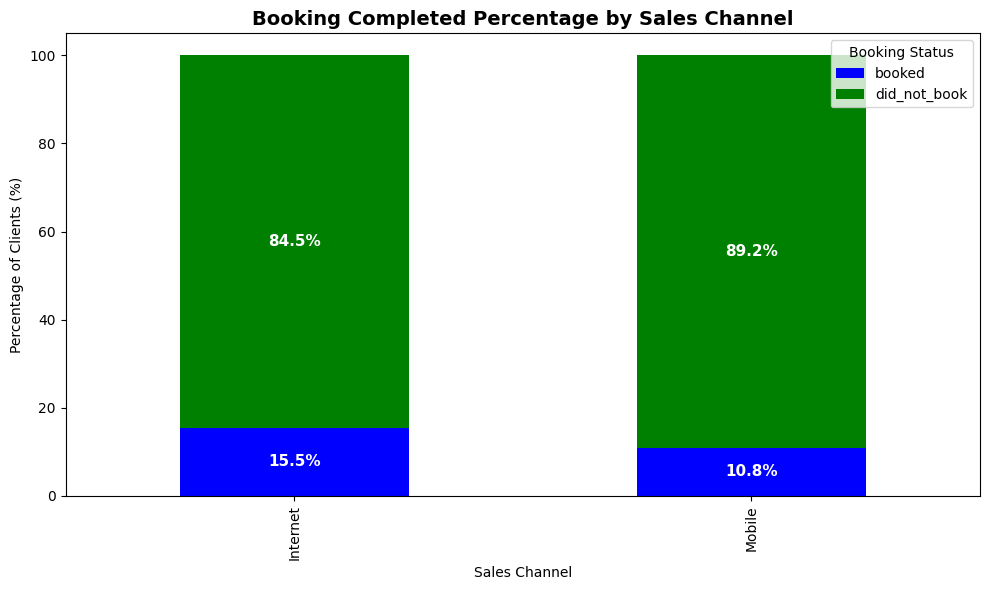

In [46]:
booking_counts = df.groupby('sales_channel')['booking_complete'].value_counts(normalize=True).unstack().fillna(0) * 100
booking_counts.columns = ['booked', 'did_not_book']

ax = booking_counts[['did_not_book', 'booked']].plot(
    kind='bar', 
    stacked=True, 
    color=['blue', 'green'], 
    figsize=(10,6)
)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white', fontsize=11, fontweight='bold')

ax.set_ylabel('Percentage of Clients (%)')
ax.set_xlabel('Sales Channel')
ax.set_title('Booking Completed Percentage by Sales Channel', fontsize=14, fontweight='bold')
ax.legend(['booked', 'did_not_book'], title='Booking Status', loc='upper right')
plt.tight_layout()
plt.show()

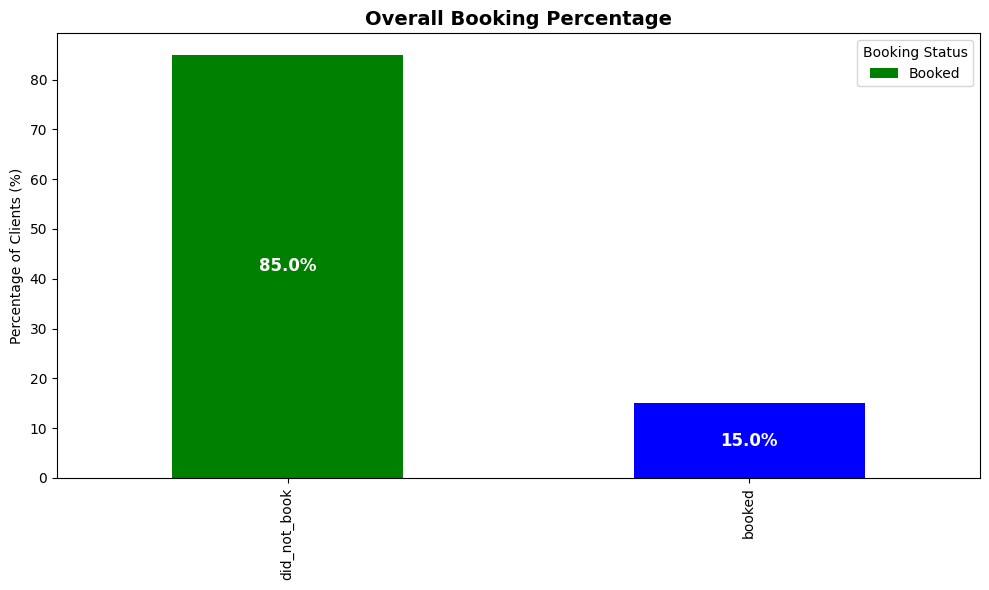

In [47]:
booking_total = df['booking_complete'].value_counts(normalize=True) * 100
booking_total.index = ['did_not_book' if i == 0 else 'booked' for i in booking_total.index]

ax_total = booking_total.plot(
    kind='bar',
    stacked=True,
    color=['green', 'blue'],
    figsize=(10, 6)
)

for p in ax_total.patches:
    height = p.get_height()
    if height > 0:
        ax_total.annotate(f'{height:.1f}%', (p.get_x() + p.get_width()/2, height/2), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

ax_total.set_ylabel('Percentage of Clients (%)')
ax_total.set_xlabel('')
ax_total.set_title('Overall Booking Percentage', fontsize=14, fontweight='bold')
ax_total.legend(['Booked', 'Did Not Book'], title='Booking Status')
plt.tight_layout()
plt.show()

In [48]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

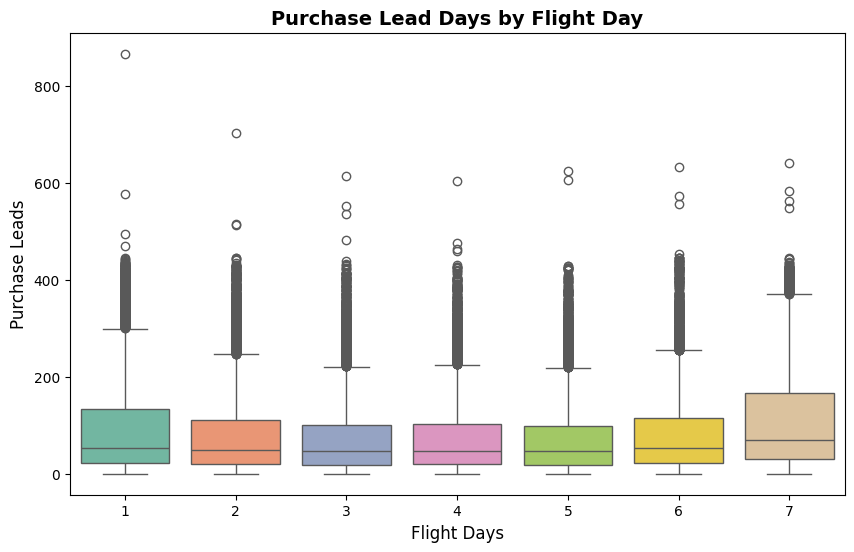

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='flight_day', y='purchase_lead', data=df, palette='Set2')
plt.title('Purchase Lead Days by Flight Day', fontsize=14, fontweight='bold')
plt.xlabel('Flight Days', fontsize=12)
plt.ylabel('Purchase Leads', fontsize=12)
plt.show()

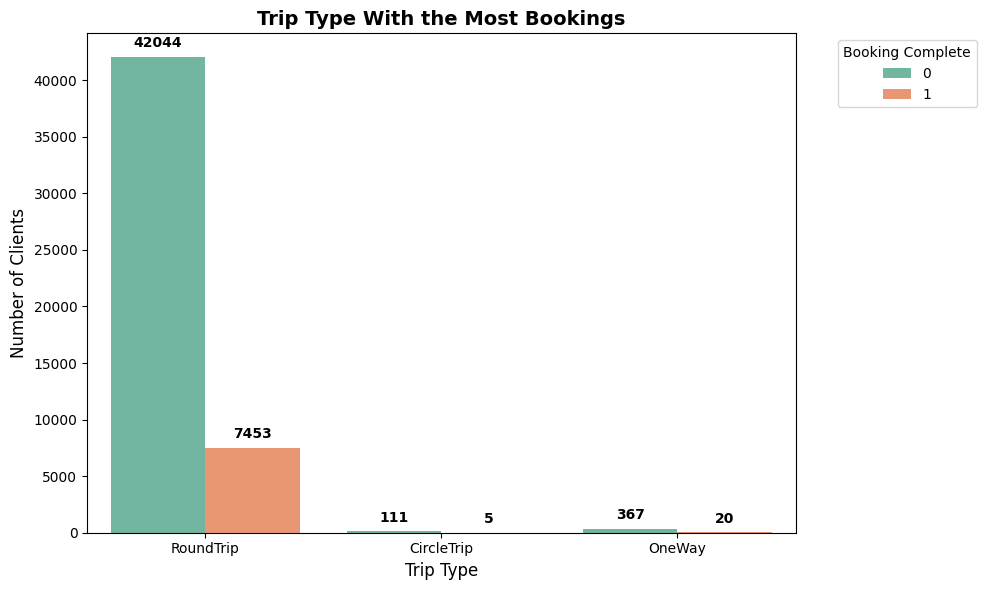

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='trip_type', hue='booking_complete', data=df, palette='Set2')
plt.title('Trip Type With the Most Bookings', fontsize=14, fontweight='bold')
plt.xlabel('Trip Type', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Add annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        ax.annotate(f'{height:.0f}', 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='bottom', 
                   fontsize=10, fontweight='bold',
                   xytext=(0, 5), textcoords='offset points')

plt.legend(title='Booking Complete', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
# Assuming 'booking_complete' indicates successful booking (1 = success, 0 = failure)
successful_bookings = df[df['booking_complete'] == 1]
average_purchase_lead_success = successful_bookings['purchase_lead'].mean()

print(f"Average purchase lead for successful bookings: {average_purchase_lead_success:.2f} days")

Average purchase lead for successful bookings: 80.17 days


In [52]:
# Average purchase lead by booking status
purchase_lead_stats = df.groupby('booking_complete')['purchase_lead'].agg(['mean', 'median', 'std', 'count']).round(2)

print("Purchase Lead Statistics by Booking Status:")
print(purchase_lead_stats)
print("\n")

# Or get more detailed breakdown
successful_avg = df[df['booking_complete'] == 1]['purchase_lead'].mean()
unsuccessful_avg = df[df['booking_complete'] == 0]['purchase_lead'].mean()

print(f"Average purchase lead for SUCCESSFUL bookings: {successful_avg:.2f} days")
print(f"Average purchase lead for UNSUCCESSFUL bookings: {unsuccessful_avg:.2f} days")
print(f"Difference: {abs(successful_avg - unsuccessful_avg):.2f} days")

Purchase Lead Statistics by Booking Status:
                   mean  median    std  count
booking_complete                             
0                 85.78    52.0  90.53  42522
1                 80.17    46.0  89.84   7478


Average purchase lead for SUCCESSFUL bookings: 80.17 days
Average purchase lead for UNSUCCESSFUL bookings: 85.78 days
Difference: 5.61 days


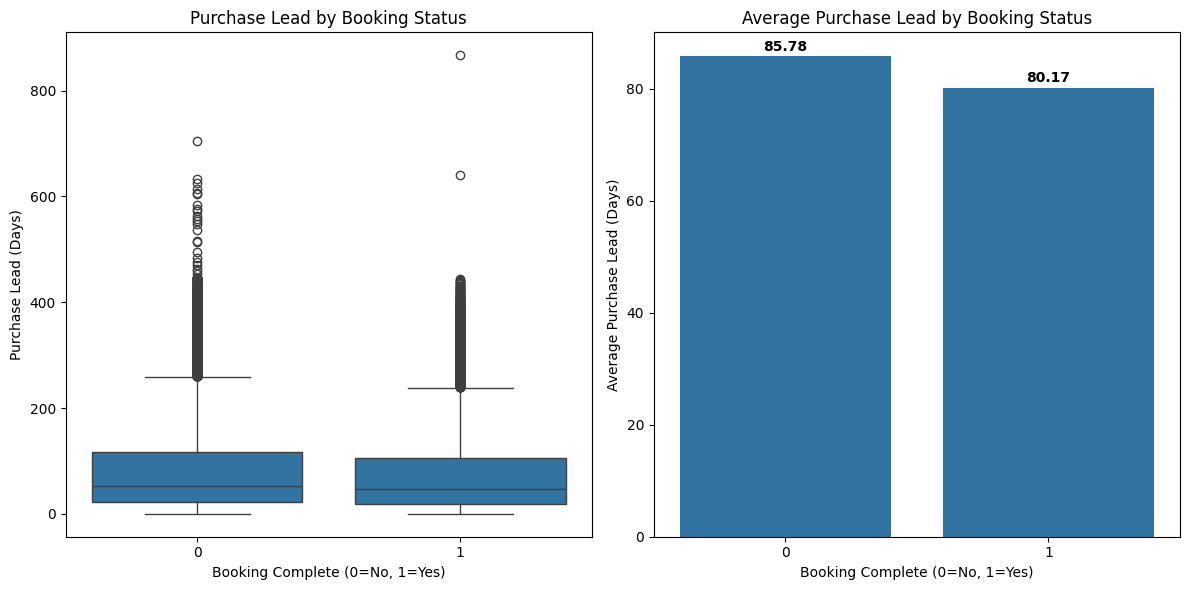


Average purchase lead for successful bookings: 80.17 days


In [53]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.title('Purchase Lead by Booking Status')
plt.xlabel('Booking Complete (0=No, 1=Yes)')
plt.ylabel('Purchase Lead (Days)')

# Bar plot with averages
plt.subplot(1, 2, 2)
avg_purchase_lead = df.groupby('booking_complete')['purchase_lead'].mean()
sns.barplot(x=avg_purchase_lead.index, y=avg_purchase_lead.values)
plt.title('Average Purchase Lead by Booking Status')
plt.xlabel('Booking Complete (0=No, 1=Yes)')
plt.ylabel('Average Purchase Lead (Days)')

# Add value labels on bars
for i, v in enumerate(avg_purchase_lead.values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nAverage purchase lead for successful bookings: {avg_purchase_lead[1]:.2f} days")

In [54]:
# Detailed statistics for successful bookings
successful_stats = df[df['booking_complete'] == 1]['purchase_lead'].describe()

print("Detailed Statistics for Successful Bookings:")
print(successful_stats)

Detailed Statistics for Successful Bookings:
count    7478.000000
mean       80.167157
std        89.836401
min         0.000000
25%        18.000000
50%        46.000000
75%       106.000000
max       867.000000
Name: purchase_lead, dtype: float64


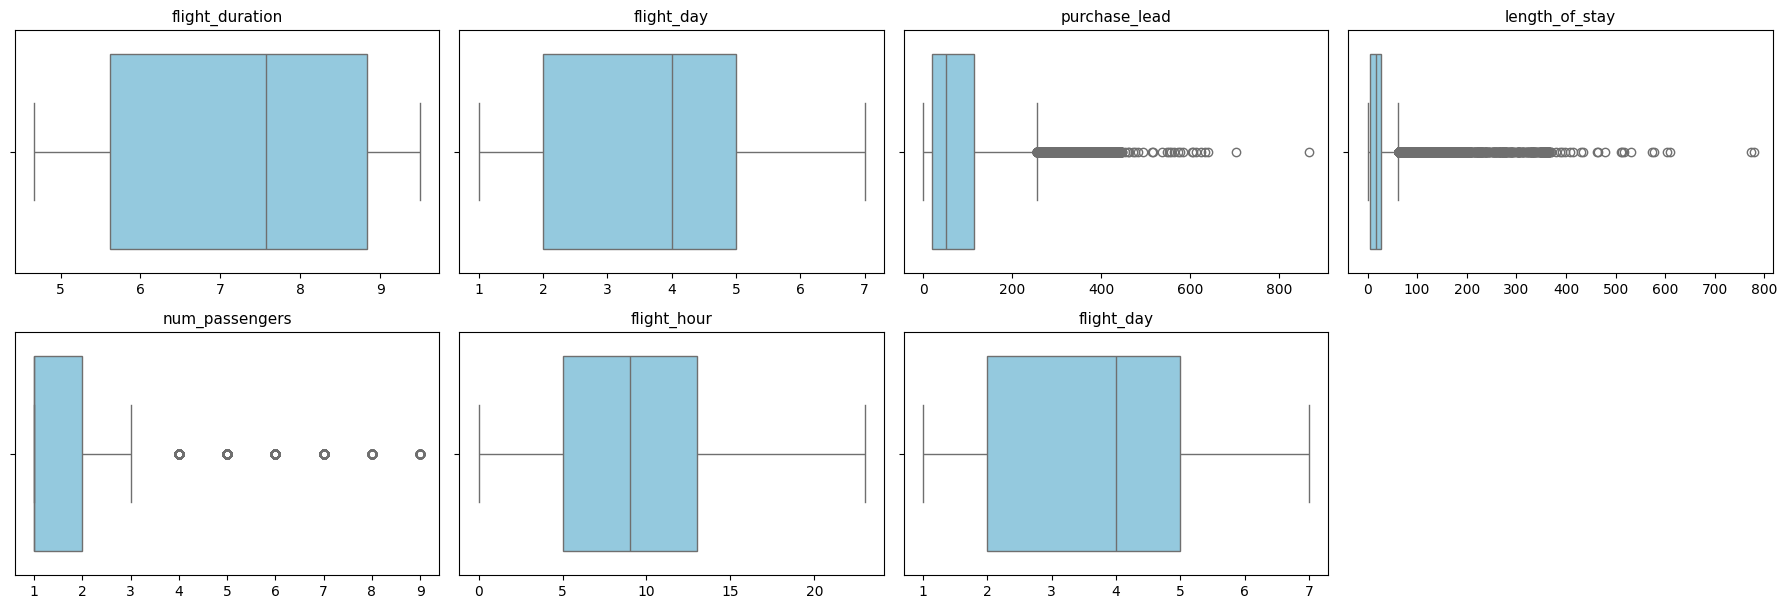

In [55]:
num_cols = [
    'flight_duration', 'flight_day', 'purchase_lead', 'length_of_stay','num_passengers',
    'flight_hour','flight_day'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=11)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [56]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

### Feature Engineering

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [58]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [59]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

#### Creating Dummies

In [60]:
df['channel_internet'] = (df['sales_channel'] == 'Internet').astype(int)
df['channel_mobile']   = (df['sales_channel'] == 'Mobile').astype(int)

df['trip_roundtrip']   = (df['trip_type'] == 'RoundTrip').astype(int)
df['trip_circleway']   = (df['trip_type'] == 'CircleTrip').astype(int)
df['trip_oneway']      = (df['trip_type'] == 'OneWay').astype(int)

In [61]:
df.drop(columns=['trip_type','sales_channel','booking_origin','route'], axis= 1, inplace=True)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_internet,channel_mobile,trip_roundtrip,trip_circleway,trip_oneway
0,2,262,19,7,6,1,0,0,5.52,0,1,0,1,0,0
1,1,112,20,3,6,0,0,0,5.52,0,1,0,1,0,0
2,2,243,22,17,3,1,1,0,5.52,0,1,0,1,0,0
3,1,96,31,4,6,0,0,1,5.52,0,1,0,1,0,0
4,2,68,22,15,3,1,0,1,5.52,0,1,0,1,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
 10  channel_internet       50000 non-null  int64  
 11  channel_mobile         50000 non-null  int64  
 12  trip_roundtrip         50000 non-null  int64  
 13  trip_circleway         50000 non-null  int64  
 14  trip_oneway            50000 non-null  int64  
dtypes:

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


#### Ploting the Correlation Matrix

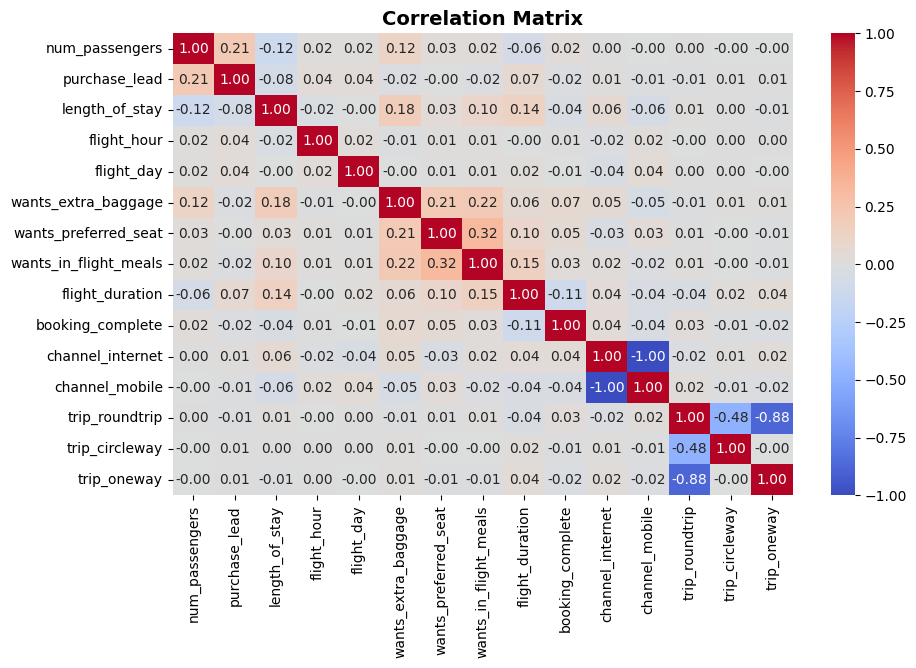

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

### Modeling

In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree

In [66]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['booking_complete']
X = df.drop(columns=['booking_complete'])
print(X.shape)
print(y.shape)

(50000, 14)
(50000,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37500, 14)
(37500,)
(12500, 14)
(12500,)


In [68]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Evaluation

In [69]:
y_pred = model.predict(X_test)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8492


In [71]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print(cv_scores.mean())

0.8471733333333334


In [72]:
print(confusion_matrix(y_test, y_pred))

[[10507   141]
 [ 1744   108]]


Text(0.5, 1.0, 'Confusion Matrix')

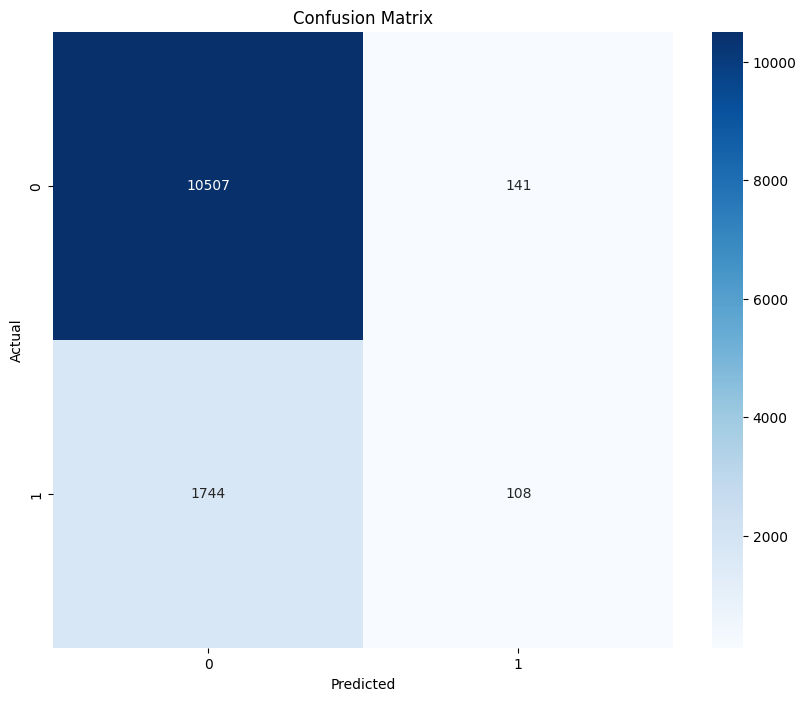

In [73]:
plt.figure(figsize=(10,8))
cnf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10648
           1       0.43      0.06      0.10      1852

    accuracy                           0.85     12500
   macro avg       0.65      0.52      0.51     12500
weighted avg       0.79      0.85      0.80     12500



In [75]:
from sklearn.metrics import average_precision_score, precision_recall_curve, classification_report
y_scores = model.predict_proba(X_test)[:, 1]   # probability of class 1
print("PR-AUC:", average_precision_score(y_test, y_scores))

PR-AUC: 0.25553343547132257


PR-AUC: 0.25553343547132257


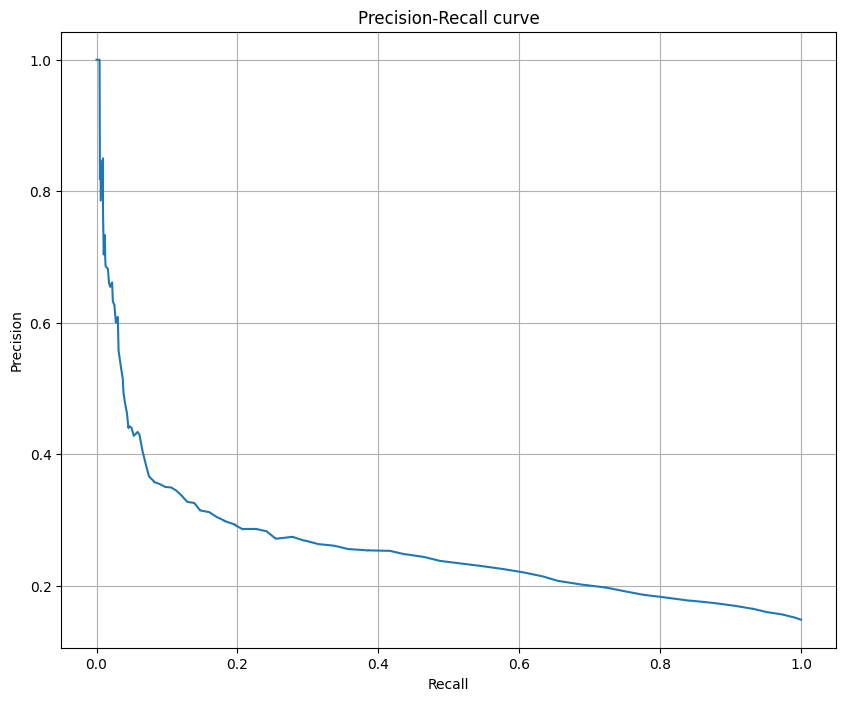

In [76]:
plt.figure(figsize=(10,8))
y_scores = model.predict_proba(X_test)[:,1]
print("PR-AUC:", average_precision_score(y_test, y_scores))

prec, rec, thresh = precision_recall_curve(y_test, y_scores)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.grid(True)
plt.show()

### Feature Importance
Determining what influences customer booking according to our model.

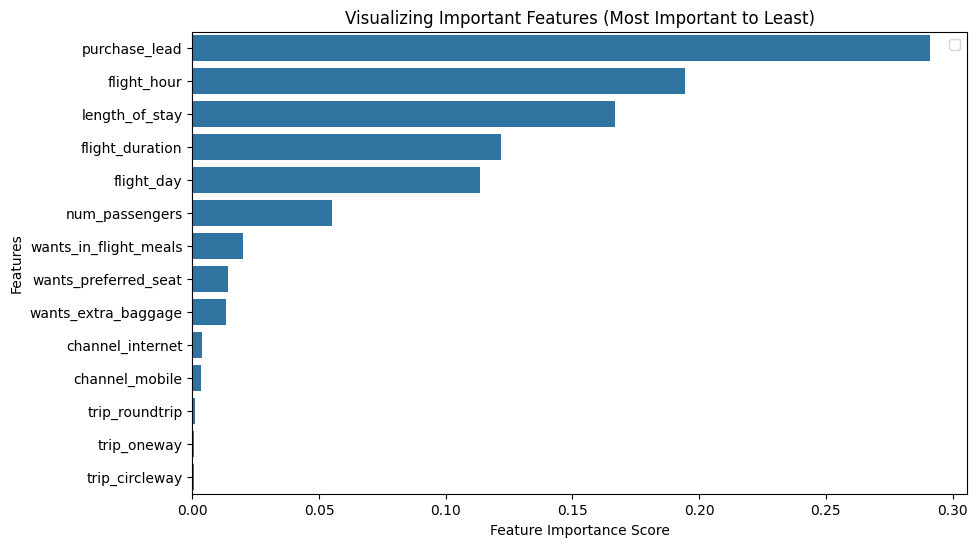

In [77]:
plt.figure(figsize=(10,6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_feat = feature_importances.sort_values(ascending=False)
sns.barplot(x=sorted_feat.values, y=sorted_feat.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Most Important to Least)")
plt.legend()
plt.show()

### Hyperparameter Optimization
Note: I used GridSearchCV for this parameter, though I haven't included it in this notebook.
Trying to see how the model can be improved

In [78]:
model_2 = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=50         # use all cores to speed up training
)
model_2.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_pred_tuned = model_2.predict(X_test)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.85184


Text(0.5, 1.0, 'Confusion Matrix')

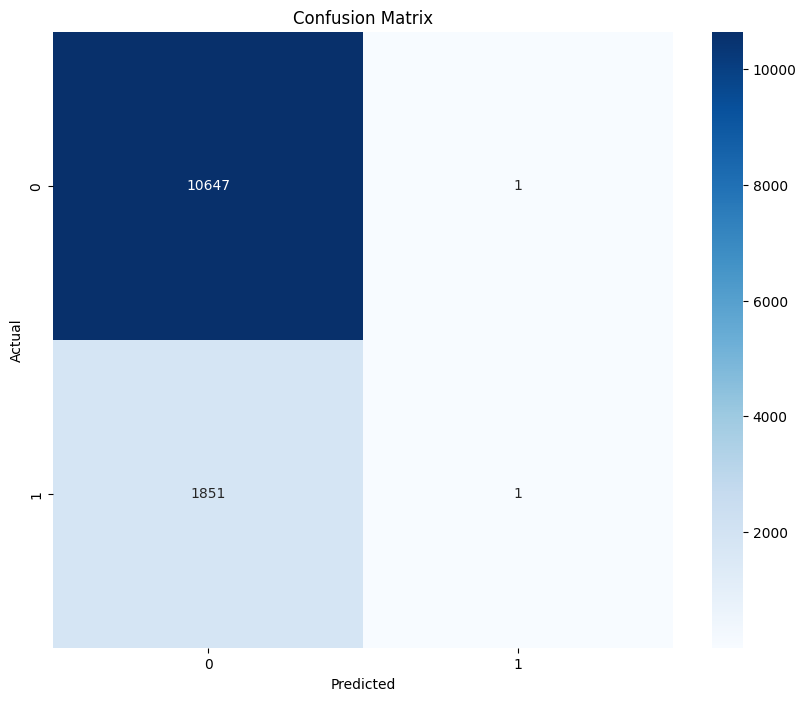

In [81]:
plt.figure(figsize=(10,8))
cnf_matrix = confusion_matrix(y_test, y_pred_tuned, labels=model_2.classes_)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [82]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     10648
           1       0.50      0.00      0.00      1852

    accuracy                           0.85     12500
   macro avg       0.68      0.50      0.46     12500
weighted avg       0.80      0.85      0.78     12500



PR-AUC: 0.2625604055086411


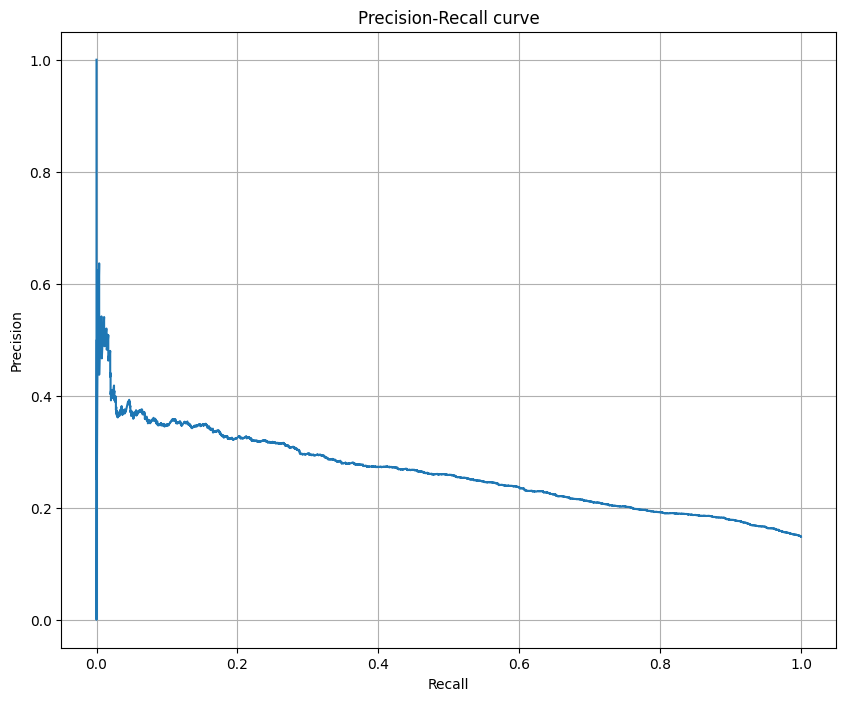

In [83]:
plt.figure(figsize=(10,8))
y_scores = model_2.predict_proba(X_test)[:,1]
print("PR-AUC:", average_precision_score(y_test, y_scores))

prec, rec, thresh = precision_recall_curve(y_test, y_scores)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.grid(True)
plt.show()

#### Feature Importance for the optimized model 2

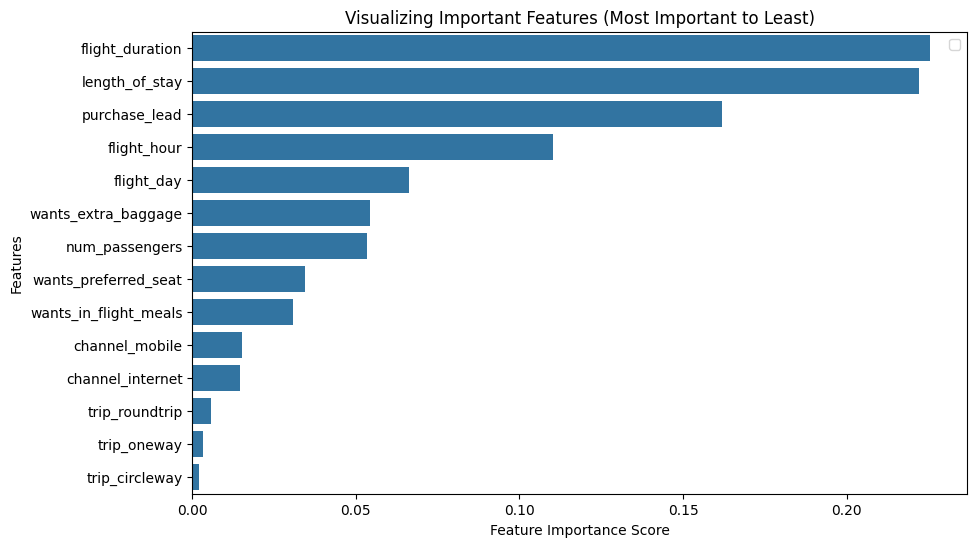

In [84]:
plt.figure(figsize=(10,6))
feature_importances = pd.Series(model_2.feature_importances_, index=X.columns)
sorted_feat = feature_importances.sort_values(ascending=False)
sns.barplot(x=sorted_feat.values, y=sorted_feat.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Most Important to Least)")
plt.legend()
plt.show()

#### Recommendation
I highly recommend implementing the first model as the insight for customer buying behavior because it better predicts customers who will complete the booking.